In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

TEST_TIMEOUT = 60
sns.set(rc={'figure.figsize':(11.7,6)})


In [7]:
df = pd.read_csv("../data/nat.csv", header=0)
# take the average values for each switch x packet size 
avg_df = df.groupby(['switch', 'packet size']).mean()

# dont need trial no. anymore 
avg_df = avg_df.drop('trial', axis=1)

avg_df = avg_df.reset_index()

# # set messages/sec to be messages sent / TEST TIMEOUT 
avg_df['messages per sec'] = avg_df['number of messages'] / TEST_TIMEOUT

avg_df = avg_df.rename(columns={"packet size":"packet size (bytes)",
                               })

In [8]:
avg_df

switch  packet size (bytes)  total test time (s)  \
0    dpdk                   20            29.404328   
1    dpdk                   64            24.320121   
2    dpdk                  100            23.605113   
3    dpdk                  500            21.243615   
4    dpdk                 1000            21.093999   
5    dpdk                 1500            20.780573   
6    ovs                    20            33.837330   
7    ovs                    64            29.328625   
8    ovs                   100            28.560745   
9    ovs                   500            25.470612   
10   ovs                  1000            23.276114   
11   ovs                  1500            23.252593   

    last data packet received  number of messages  avg send message time (s)  \
0                1.594000e+07        4.802018e+06               6.002238e-07   
1                4.366667e+06        1.799108e+06               3.216138e-06   
2                2.320000e+06        1.776316e+06               6.416789e-06   
3                5.000000e+05        4.309883e+05               3.774319e-05   
4                2.000000e+05        2.568969e+05               7.554809e-05   
5                1.000000e+05        1.713857e+05               1.134230e-04   
6                1.717143e+07        5.030637e+06               7.397634e-07   
7                3.225000e+06        2.555766e+06               3.538920e-06   
8                2.100000e+06        1.942432e+06               6.618675e-06   
9                4.833333e+05        4.122870e+05               3.453340e-05   
10               1.666667e+05        2.543643e+05               7.006591e-05   
11               1.000000e+05        1.713645e+05               1.071132e-04   

    messages per sec  
0       80033.636667  
1       29985.133333  
2       29605.263333  
3        7183.138889  
4        4281.614583  
5        2856.427778  
6       83843.945833  
7       42596.108333  
8       32373.861111  
9        6871.450000  
10       4239.405556  
11       2856.075000

In [11]:
# set log cols: 
LOG_COLS = ['packet size (bytes)',
            'number of messages', 
            'messages per sec', 
            'avg send message time (s)']

for lc in LOG_COLS: 
    print(lc)
    avg_df[f'{lc}_log10'] = np.log10(avg_df[f'{lc}']) 

packet size (bytes)
number of messages
messages per sec
avg send message time (s)


In [12]:
avg_df.head()

switch  packet size (bytes)  total test time (s)  last data packet received  \
0   dpdk                   20            29.404328               1.594000e+07   
1   dpdk                   64            24.320121               4.366667e+06   
2   dpdk                  100            23.605113               2.320000e+06   
3   dpdk                  500            21.243615               5.000000e+05   
4   dpdk                 1000            21.093999               2.000000e+05   

   number of messages  avg send message time (s)  messages per sec  \
0        4.802018e+06               6.002238e-07      80033.636667   
1        1.799108e+06               3.216138e-06      29985.133333   
2        1.776316e+06               6.416789e-06      29605.263333   
3        4.309883e+05               3.774319e-05       7183.138889   
4        2.568969e+05               7.554809e-05       4281.614583   

   packet size (bytes)_log10  number of messages_log10  \
0                    1.30103                  6.681424   
1                    1.80618                  6.255057   
2                    2.00000                  6.249520   
3                    2.69897                  5.634466   
4                    3.00000                  5.409759   

   messages per sec_log10  avg send message time (s)_log10  
0                4.903273                        -6.221687  
1                4.476906                        -5.492665  
2                4.471369                        -5.192682  
3                3.856314                        -4.423161  
4                3.631608                        -4.121777

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


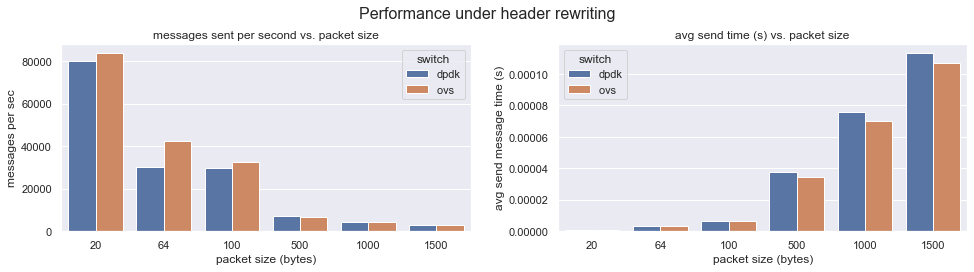

In [14]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
messages_sec = sns.barplot(
    data=avg_df, 
    y='messages per sec',
    x="packet size (bytes)",
    hue='switch',
#     marker='o', 
    ax=ax[0],
    ci=None).set_title('messages sent per second vs. packet size')

avg_send_time = sns.barplot(
    data=avg_df, 
    y='avg send message time (s)',
    x="packet size (bytes)",
    hue='switch',
#     marker='o',
    ax=ax[1],
    ci=None).set_title('avg send time (s) vs. packet size')


fig.suptitle('Performance under header rewriting', fontsize=16) # or plt.suptitle('Main title')
fig.tight_layout(pad=2.0)
fig.subplots_adjust(top=0.85)
fig.show()
